In [12]:
import pandas as pd
import sklearn as skl
import numpy as np
import itertools

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

In [4]:
df=pd.read_csv("train.csv",index_col='qid')
df=df.dropna()
df.target.value_counts()
df.head()

,question_text,target
qid,,
00002165364db923c7e6,How did Quebec nationalists see their province...,0
000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
n=8500
indices=df.index.values[:n]
X=df['question_text'][:n]
Y=df['target'][:n]

shuffle=skl.utils.shuffle(indices)
train_indices=shuffle[:int(n*3/4)+1]
test_indices=shuffle[int(n*3/4)+1:]

X_train=X.loc[train_indices]
X_test=X.loc[test_indices]
Y_train=Y.loc[train_indices]
Y_test=Y.loc[test_indices]

In [6]:
# takes in type of vectorizer, train/test set info, and
# params = ngram_range, min_df, max_df, binary
def apply_vectorizer(vectorizer_type,X_train,Y_train,X_test,params):
    ngram_range, min_df, max_df, binary = params
    if vectorizer_type=="count":
        vectorizer=CountVectorizer(stop_words='english',ngram_range=ngram_range,min_df=min_df,max_df=max_df,binary=binary)
    else:
        vectorizer=TfidfVectorizer(stop_words='english',ngram_range=ngram_range,min_df=min_df,max_df=max_df,binary=binary)
    vectorizer.fit(X_train,Y_train)
    return (vectorizer.transform(X_train),vectorizer.transform(X_test))

In [15]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    # train classifier, get predictions
    clf.fit(x_train,y_train)
    y_pred=clf.predict_proba(x_test)[:,1]
    
    # Calculate FPR, TPR, thresholds, and roc_curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    roc_auc=metrics.auc(fpr,tpr)
    
    # Calculate f1_score manually via precision & recall
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print(precision,recall)
    fscores = 2*np.divide(np.multiply(precision, recall), np.add(precision, recall))
    
    # find index of best f1_score
    i_best_fscore=np.argmax(fscores)
    
    return fpr,tpr,thresholds,fscores,i_best_fscore,roc_auc

In [16]:
def plot_AUC(fpr,tpr,roc_auc,color,label):
    plt.plot(fpr, tpr, color, label = label + ' = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

[0.06427221 0.06382979 0.06385998 0.0638902  0.06392045 0.06395073
 0.06398104 0.06353722 0.06356736 0.06359753 0.06362773 0.06365796
 0.06368821 0.0637185  0.06374881 0.06330319 0.06333333 0.06336351
 0.06339371 0.06342394 0.0634542  0.06348449 0.0635148  0.06354515
 0.06357553 0.06360593 0.06363636 0.06366683 0.06369732 0.06372784
 0.06375839 0.06378897 0.06381958 0.06385022 0.06388088 0.06391158
 0.06394231 0.06397306 0.06400385 0.06403467 0.06406551 0.06409639
 0.06412729 0.06415822 0.06418919 0.06422018 0.06431335 0.06386067
 0.06389158 0.06392252 0.06395349 0.06398449 0.06401552 0.06404658
 0.06407767 0.06410879 0.06365403 0.06368498 0.06371595 0.06326034
 0.06329114 0.06332197 0.06335283 0.06338372 0.06341463 0.06295754
 0.06298828 0.06301905 0.06304985 0.06308068 0.06311155 0.06314244
 0.06268364 0.06271436 0.0627451  0.06277587 0.06280667 0.06283751
 0.06286837 0.06240786 0.06243854 0.06246926 0.06200787 0.0620384
 0.06166749 0.06169793 0.06135576 0.06138614 0.06141654 0.06159

[0.06403013 0.07825296 0.12984055 0.10769231 0.16666667 0.16666667
 0.20833333 0.171875   0.18       0.25       0.2173913  0.23529412
 0.33333333 0.25       0.28571429 0.4        0.25       0.33333333
 0.5        0.         1.        ] [1.         0.63235294 0.41911765 0.30882353 0.19852941 0.16176471
 0.11029412 0.08088235 0.06617647 0.05147059 0.03676471 0.02941176
 0.02205882 0.01470588 0.01470588 0.01470588 0.00735294 0.00735294
 0.00735294 0.         0.        ]
Threshold:  1.8285148607507665e-32
F1 Score:  nan


/Users/elliotsilva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


[0.06403013 0.07825296 0.12984055 0.10769231 0.16666667 0.16666667
 0.20833333 0.171875   0.18       0.25       0.2173913  0.23529412
 0.33333333 0.25       0.28571429 0.4        0.25       0.33333333
 0.5        0.         1.        ] [1.         0.63235294 0.41911765 0.30882353 0.19852941 0.16176471
 0.11029412 0.08088235 0.06617647 0.05147059 0.03676471 0.02941176
 0.02205882 0.01470588 0.01470588 0.01470588 0.00735294 0.00735294
 0.00735294 0.         0.        ]
Threshold:  1.8285148607507665e-32
F1 Score:  nan


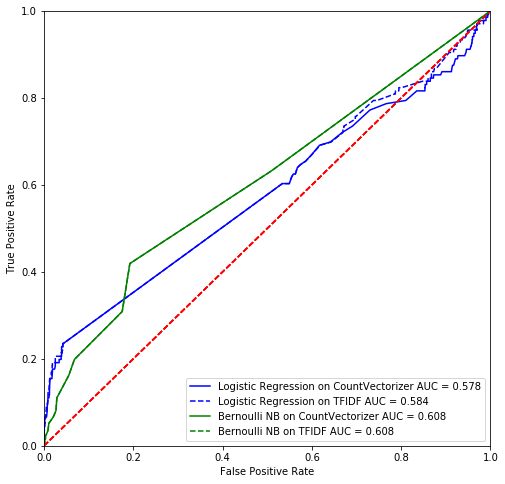

In [17]:
# we can potentially iterate over this list
binary_values=[True,False]
ngram_values=[1,2,3]
vectorizers=[CountVectorizer(),TfidfVectorizer()]
classifiers=[LogisticRegression(), BernoulliNB()]
min_df=[.25,.5,.75,1]
max_df=[.25,.5,.75,.1]
#stop_words=['english',None] # stopwords is a good idea

# this is how we'd iterate
params_list=list(itertools.product(binary_values, ngram_values, vectorizers, min_df, max_df))

# for now we'll manually assign parameters, and apply to both Count/Tfidf Vectorizr, and LR & NB
params=[(1,2),1,1,True]
    
    
# the following will
colors = ['b','b--','g','g--']
labels = ['Logistic Regression on CountVectorizer AUC', 'Logistic Regression on TFIDF AUC',
          'Bernoulli NB on CountVectorizer AUC', 'Bernoulli NB on TFIDF AUC']
i=0

# to iterate: one more outer loop "for params in params_list"
for clf in [LogisticRegression(),BernoulliNB()]:
    for vectorizer_type in ["count","tfidf"]:
        X_train_transformed,X_test_transformed = apply_vectorizer(vectorizer_type,X_train,Y_train,X_test,params)
        fpr,tpr,thresholds,fscores,i_fscore,roc_auc=train_classifier(clf,X_train_transformed,Y_train,X_test_transformed,Y_test)
        print("Threshold: ",thresholds[i_fscore])
        print("F1 Score: ",fscores[i_fscore])
        plot_AUC(fpr,tpr,roc_auc,colors[i],labels[i])
        i+=1

plt.show()

In [18]:
df_in = df[df.target == 1]
pd.set_option('max_colwidth', 240)
df_in.sample(10)
df.head()

,question_text,target
qid,,
00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0
000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0
0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0
000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0
0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0


In [19]:
df.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64